In [6]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [76]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [77]:
img = cv2.imread('./data/train/ryujin500x500.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

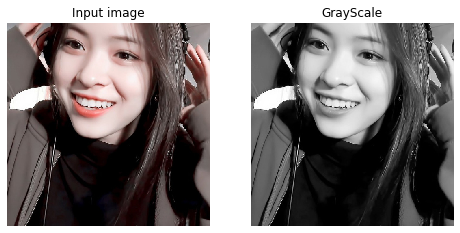

In [109]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image)
ax1.set_title('Input image')
ax2.axis('off')
ax2.imshow(img_gray, cmap="gray")
ax2.set_title('GrayScale')
plt.show()

In [79]:
resized_image_gray = cv2.resize(img_gray,(50,50))
resized_image = cv2.resize(img,(50,50))
resized_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)

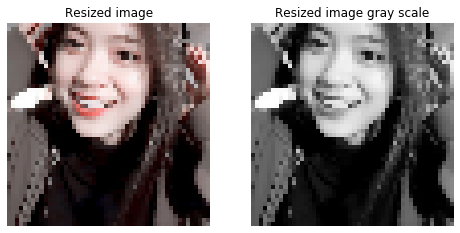

In [110]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(resized_image)
ax1.set_title('Resized image')
ax2.axis('off')
ax2.imshow(resized_image_gray, cmap="gray")
ax2.set_title('Resized image gray scale')
plt.show()

In [111]:
canny = cv2.Canny(resized_image_gray,100,200)

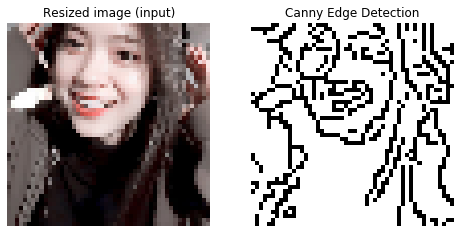

In [116]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(resized_image)
ax1.set_title('Resized image (input)')
ax2.axis('off')
ax2.imshow(canny, cmap="binary")
ax2.set_title('Canny Edge Detection')
plt.show()

In [117]:
import sys
np.set_printoptions(threshold=sys.maxsize)

In [118]:
ret, binary = cv2.threshold(canny, 254, 1, cv2.THRESH_BINARY) 

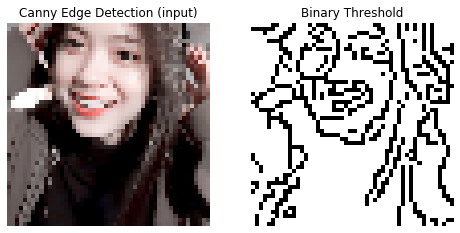

In [119]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(resized_image)
ax1.set_title('Canny Edge Detection (input)')
ax2.axis('off')
ax2.imshow(binary, cmap="binary")
ax2.set_title('Binary Threshold')
plt.show()

In [120]:
from skimage.feature import hog
from skimage import data, exposure

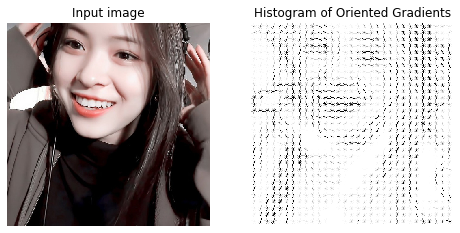

In [136]:
fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, multichannel=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap="binary")
ax2.set_title('Histogram of Oriented Gradients')
plt.show()